In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Part 1

In [2]:
charts = pd.read_csv('data/billboard_charts.csv', parse_dates=['date'])

In [3]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last-week       297775 non-null  float64       
 5   peak-rank       330087 non-null  int64         
 6   weeks-on-board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


In [4]:
charts

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [5]:
charts.set_index("weeks-on-board", inplace=True)

In [6]:
charts.sort_index(ascending=False)

,date,rank,song,artist,last-week,peak-rank
weeks-on-board,,,,,,
90,2021-09-04,20,Blinding Lights,The Weeknd,21.0,1
89,2021-08-28,21,Blinding Lights,The Weeknd,18.0,1
88,2021-08-21,18,Blinding Lights,The Weeknd,16.0,1
87,2014-05-10,49,Radioactive,Imagine Dragons,48.0,3
87,2021-08-14,16,Blinding Lights,The Weeknd,17.0,1
...,...,...,...,...,...,...
1,1958-08-04,86,To Be Loved,Jackie Wilson,NaN,86
1,1958-08-04,85,Got A Match?,The Daddy-O's,NaN,85
1,1958-08-04,84,Summertime Blues,Eddie Cochran,NaN,84


In [7]:
top_chart = charts[charts["rank"] == 1]

In [8]:
top_artist = top_chart.value_counts('artist').head(10)

<Figure size 800x600 with 0 Axes>

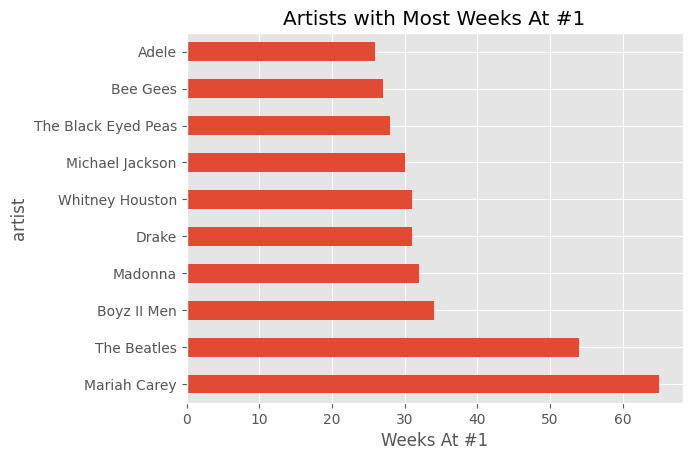

<Figure size 800x600 with 0 Axes>

In [9]:
plt.style.use('ggplot')
top_artist.plot(
    kind='barh',
    title='Artists with Most Weeks At #1',
    xlabel='Weeks At #1',
    fontsize=10
)
plt.figure(figsize=(8,6))


In [10]:
billboard = pd.read_csv('data/billboard_charts.csv')

<Axes: title={'center': 'Artists with Most Weeks At #1'}, xlabel='Weeks At #1', ylabel='artist'>

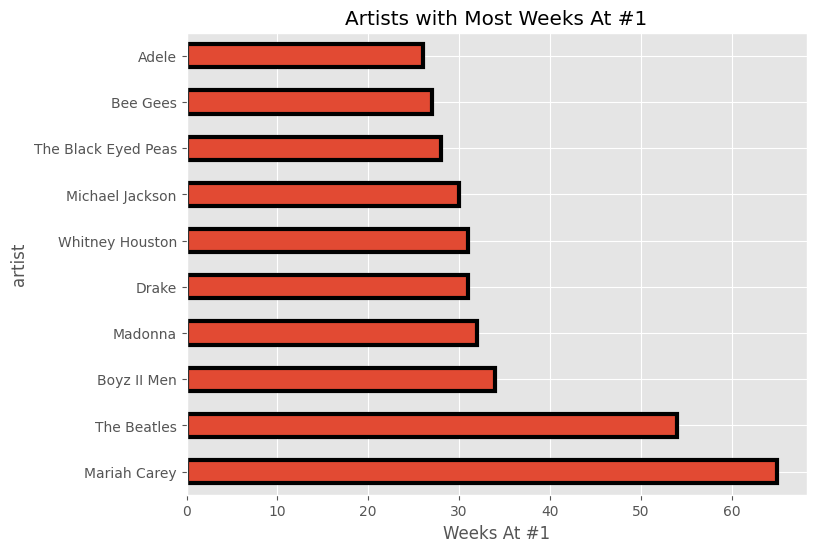

In [11]:
top_10 = billboard[billboard['rank'] == 1].artist.value_counts().head(10)
top_10.plot(
    kind='barh',
    title='Artists with Most Weeks At #1',
    figsize=(8,6),
    xlabel='Weeks At #1',
    edgecolor='black',
    linewidth=3
)

## Part 2

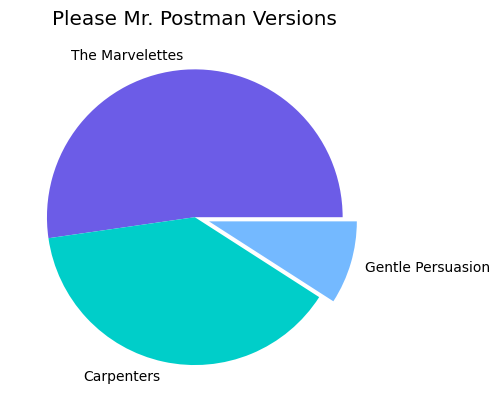

In [12]:
please_mr_postman = billboard[billboard['song'] == 'Please Mr. Postman']
colors = ["#6c5ce7","#00cec9", "#74b9ff"]
labels = please_mr_postman['artist'].value_counts().index
plt.pie(
    please_mr_postman['artist'].value_counts(),
    explode=(0,0,0.1),
    colors=colors,
    labels=labels
)
plt.title("Please Mr. Postman Versions")
plt.show()

<Axes: title={'center': 'Please Mr. Postman Versions'}, ylabel='count'>

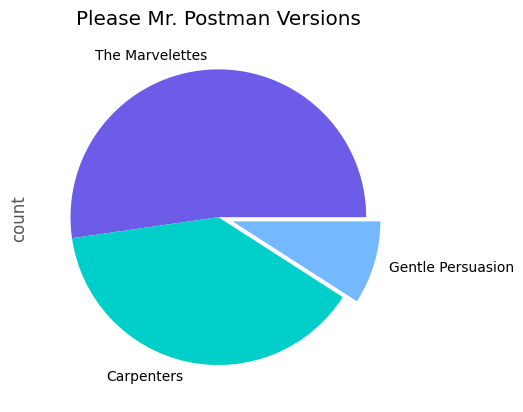

In [13]:
artists = billboard[billboard['song'] == 'Please Mr. Postman'].artist.value_counts()
colors = ["#6c5ce7","#00cec9", "#74b9ff"]
artists.plot(
    kind="pie",
    colors=colors,
    explode=(0,0,0.1),
    title="Please Mr. Postman Versions"
)

## Part 3

In [43]:
plt.rcdefaults()
ufos = pd.read_csv("data/nuforc_reports.csv", parse_dates=["date_time", "posted"])

In [44]:
ufos["month"] = ufos["date_time"].dt.month
ufos["year"] = ufos["date_time"].dt.year

In [45]:
ufos

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,month,year
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,12.0,2019.0
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,3.0,2019.0
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18,45.381383,-75.708501,4.0,2019.0
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18,NaN,NaN,3.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04,33.414036,-111.920920,10.0,2019.0
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04,37.642200,-93.399600,10.0,2019.0
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04,27.076210,-82.223280,10.0,2019.0
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04,35.605000,-82.313200,10.0,2019.0


In [48]:
ufos["shape"].value_counts()

shape
light        18230
circle       10130
triangle      7910
fireball      7095
unknown       6182
sphere        6065
other         5749
disk          4522
oval          3857
formation     2842
changing      2112
cigar         1990
flash         1675
rectangle     1597
cylinder      1374
diamond       1273
chevron        953
teardrop       767
egg            666
cone           349
cross          289
Name: count, dtype: int64

(2000.0, 2018.0)

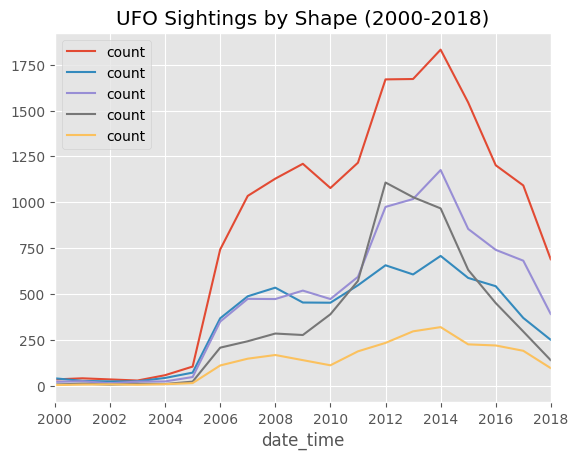

In [53]:
plt.style.use('ggplot')
ufos[ufos["shape"] == "light"].date_time.dt.year.value_counts().sort_index().plot()
ufos[ufos["shape"] == "triangle"].date_time.dt.year.value_counts().sort_index().plot()
ufos[ufos["shape"] == "circle"].date_time.dt.year.value_counts().sort_index().plot()
ufos[ufos["shape"] == "fireball"].date_time.dt.year.value_counts().sort_index().plot()
ufos[ufos["shape"] == "formation"].date_time.dt.year.value_counts().sort_index().plot()
plt.legend()
plt.title("UFO Sightings by Shape (2000-2018)")
plt.xlim(2000, 2018)

## Part 4

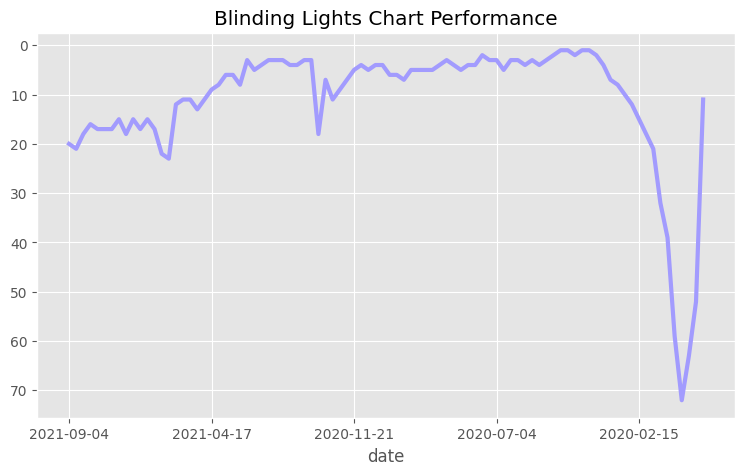

In [67]:
billboard[billboard["song"] == "Blinding Lights"].set_index("date")["rank"].plot(
    figsize=(9,5),
    title="Blinding Lights Chart Performance",
    color="#a29bfe",
    linewidth=3
)
plt.gca().invert_yaxis()

## Part 5

ConversionError: Failed to convert value(s) to axis units: ['2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25', '2020-12-25']

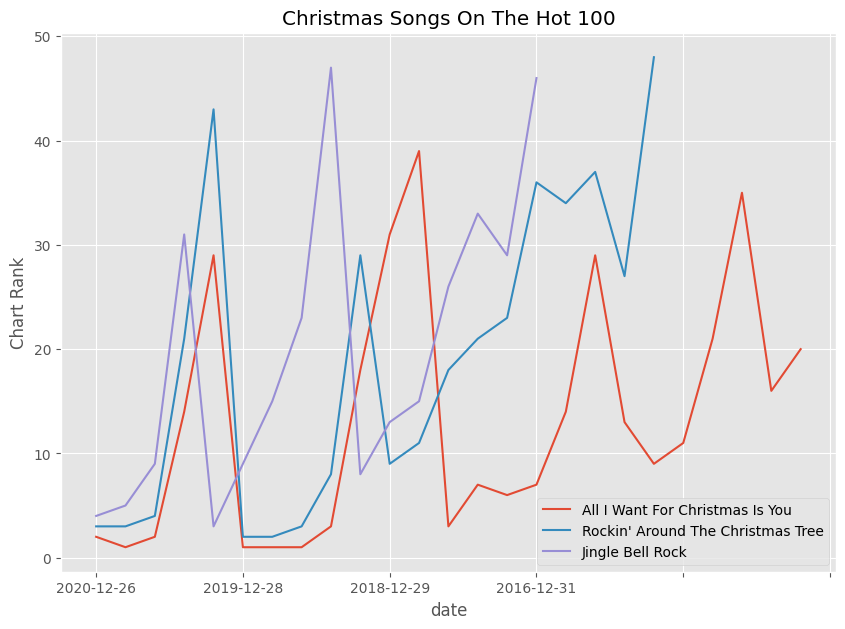

In [72]:
plt.figure(figsize=(10,7))
df = billboard[billboard["date"].between("2016-12-25", "2021-01-01")].set_index("date")
all_i_want = df[df["song"] == "All I Want For Christmas Is You"]
all_i_want["rank"].plot(label="All I Want For Christmas Is You")

rockin = df[(df["song"] == "Rockin' Around The Christmas Tree") & (df["artist"] == "Brenda Lee")]
rockin["rank"].plot(label="Rockin' Around The Christmas Tree")

jingle = df[df["song"] == "Jingle Bell Rock"]
jingle["rank"].plot(label="Jingle Bell Rock")

plt.legend()
plt.ylabel("Chart Rank")
plt.title("Christmas Songs On The Hot 100")
plt.xticks(
    ["2016-12-25", "2017-12-25","2018-12-25","2019-12-25","2020-12-25"],
    labels=["Xmas 2016", "Xmas 2017","Xmas 2018","Xmas 2019","Xmas 2020",]
)
plt.gca().invert_yaxis()

## Part 6

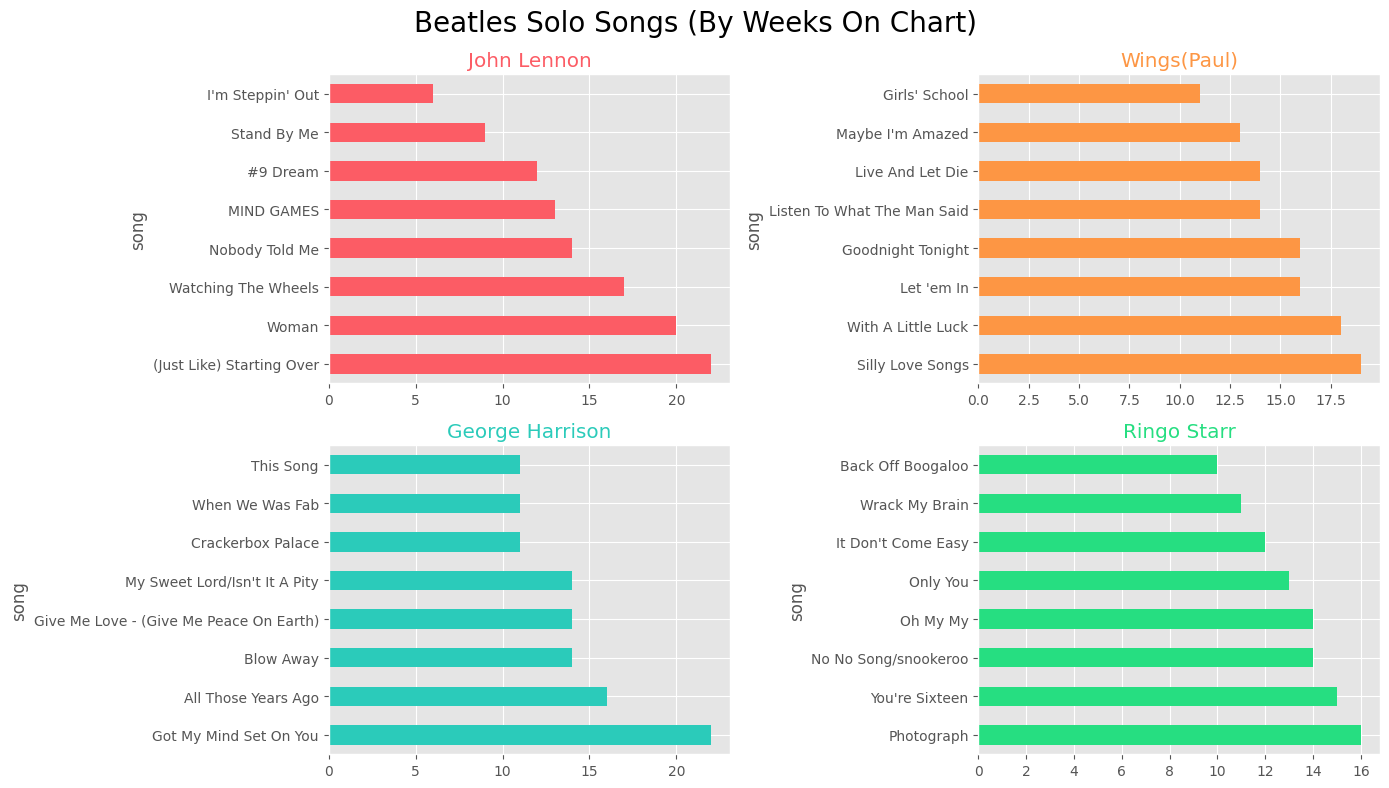

In [73]:
jl = billboard[billboard["artist"] == "John Lennon"]["song"].value_counts().head(8)
wings = billboard[billboard["artist"] == "Wings"]["song"].value_counts().head(8)
gh = billboard[billboard["artist"] == "George Harrison"]["song"].value_counts().head(8)
rs = billboard[billboard["artist"] == "Ringo Starr"]["song"].value_counts().head(8)

fig, axs = plt.subplots(2,2, figsize=(14,8))
fig.suptitle("Beatles Solo Songs (By Weeks On Chart)", fontsize=20 )

jl.plot(kind="barh", ax=axs[0][0], color="#fc5c65")
axs[0][0].set_title("John Lennon", color="#fc5c65")

wings.plot(kind="barh", ax=axs[0][1], color="#fd9644")
axs[0][1].set_title("Wings(Paul)", color="#fd9644")

gh.plot(kind="barh", ax=axs[1][0], color="#2bcbba")
axs[1][0].set_title("George Harrison", color="#2bcbba")

rs.plot(kind="barh", ax=axs[1][1], color="#26de81")
axs[1][1].set_title("Ringo Starr", color="#26de81")


plt.tight_layout()